In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

In [2]:
city_hour = pd.read_csv('city_hour.csv')
station_hour = pd.read_csv('station_hour.csv')
station_day = pd.read_csv('station_day.csv')
city_day = pd.read_csv('city_day.csv')
stations = pd.read_csv('stations.csv')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
city_day.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


### Analysis of COVID-19 on Air Quality in India
Lockdown began in India on 25th March 2020. From bottleneck traffic blockages across the city, we saw deserted highways. 
In this analysis we will determine the if there was an actual dramatic change in the Air quality across various Indian Cities.

### EDA
#####  There are lots of Nan Values which can't be removed thus we shall fill in the columns with bfill and ffill.

In [11]:
city_day = city_day.bfill().ffill()
city_hour = city_hour.bfill().ffill()

#### CONVERTING TO A DATETIME OBJECT
#### Currently Date is an Object Type as we have seen during EDA, thus it must be converted to DateTime type.

In [7]:
city_day['Date'] = pd.to_datetime(city_day['Date'],dayfirst = True)
city_hour['Datetime'] = pd.to_datetime(city_hour['Datetime'],dayfirst = True)

In [8]:
city_day['year'] = [x.year for x in city_day.Date] 
city_day['month'] = [x.strftime('%b') for x in city_day.Date] #Month as locale's full name.
city_hour['hours'] = [x.hour for x in city_hour.Datetime]

In [12]:
city_day.shape

(29531, 18)

In [13]:
city_day.isnull().sum()

City          0
Date          0
PM2.5         0
PM10          0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
Benzene       0
Toluene       0
Xylene        0
AQI           0
AQI_Bucket    0
year          0
month         0
dtype: int64

No more null values in the dataset !

In [14]:
city_day.dtypes

City                  object
Date          datetime64[ns]
PM2.5                float64
PM10                 float64
NO                   float64
NO2                  float64
NOx                  float64
NH3                  float64
CO                   float64
SO2                  float64
O3                   float64
Benzene              float64
Toluene              float64
Xylene               float64
AQI                  float64
AQI_Bucket            object
year                   int64
month                 object
dtype: object

In [24]:
df = city_day.copy()
df['BTX'] = df['Benzene']+ df['Toluene']+ df['Xylene']
df['Particulate_Matter'] = df['PM2.5']+ df['PM10']
df['Nitrogen Oxides'] = df['NO']+ df['NO2']+ df['NOx']
df.drop(['Benzene','Toluene','Xylene','PM2.5','PM10','NO','NO2','NOx','year','month'],axis=1,inplace=True)

In [25]:
df.head()

,City,Date,NH3,CO,SO2,O3,AQI,AQI_Bucket,BTX,Particulate_Matter,Nitrogen Oxides
0,Ahmedabad,2015-01-01,26.64,0.92,27.64,133.36,209.0,Poor,0.02,214.78,36.29
1,Ahmedabad,2015-01-02,26.64,0.97,24.55,34.06,209.0,Poor,12.95,214.78,33.12
2,Ahmedabad,2015-01-03,26.64,17.40,29.07,30.70,209.0,Poor,25.45,214.78,66.40
3,Ahmedabad,2015-01-04,26.64,1.70,18.59,36.08,209.0,Poor,15.57,214.78,38.15
4,Ahmedabad,2015-01-05,26.64,22.10,39.33,39.31,209.0,Poor,28.68,214.78,81.28


(8.0, 0.0)

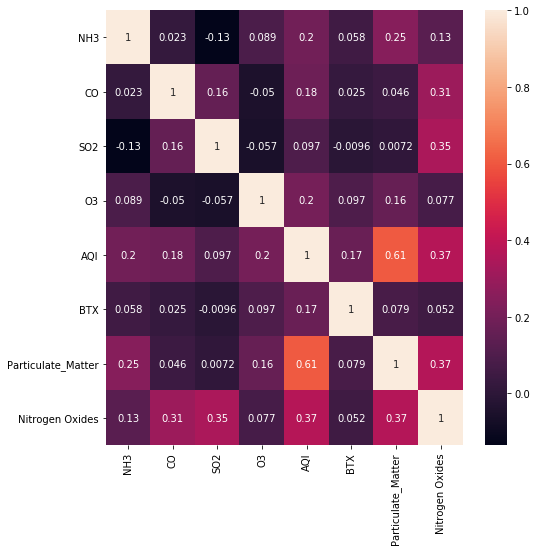

In [31]:
plt.figure(figsize=(8,8))
df_corr = df.corr()
ax = sns.heatmap(df_corr, annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [33]:
precovid = city_day.loc[(city_day['Date'] > '2014-12-31') & (city_day['Date'] < '2020-03-24')]
precovid = precovid.groupby("City").mean()
precovid.head()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,year
City,,,,,,,,,,,,,,
Ahmedabad,65.124091,138.314400,50.524783,51.432797,48.005343,26.640000,50.524783,51.544573,34.524636,5.066134,24.625710,4.189838,385.553169,2017.129911
Aizawl,35.745385,44.380769,4.785385,1.208462,7.037692,24.788462,0.490769,4.942308,5.566923,9.757692,10.161538,0.100000,59.000000,2020.000000
Amaravati,39.122797,78.522374,4.704630,23.593478,16.259201,12.794947,0.641657,14.419283,38.909589,0.619718,2.001704,1.157603,98.548766,2018.579318
Amritsar,57.504309,119.198252,18.242551,19.540455,33.521213,14.467065,0.542079,9.695201,22.579831,4.315147,3.244550,6.584969,129.099911,2018.198930
Bengaluru,37.584976,83.776789,9.693766,28.739047,19.969764,23.096815,1.896747,5.457952,33.660346,6.192111,5.060351,4.150000,95.329492,2017.129911


In [34]:
precovid.shape

(26, 14)

In [35]:
postcovid = city_day.loc[(city_day['Date'] > '2020-03-25') & (city_day['Date'] < '2020-06-01')]
postcovid = postcovid.groupby("City").mean()
postcovid.head()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,year
City,,,,,,,,,,,,,,
Ahmedabad,28.815373,78.923881,3.698507,21.775821,13.185373,26.640000,1.394179,22.691642,49.710746,4.353582,22.368657,1.996866,128.208955,2020
Aizawl,18.471194,24.278358,9.284925,0.312687,12.447463,21.427164,0.295075,8.065373,3.625224,7.793731,8.300746,0.100000,35.238806,2020
Amaravati,20.423134,47.662985,1.508657,5.765821,4.222985,8.030746,0.231642,14.373582,30.152090,0.322985,0.436567,26.597761,53.283582,2020
Amritsar,25.569254,63.889403,20.693881,14.636716,30.426418,12.702836,0.697164,10.170746,33.036866,1.260149,1.223731,5.428507,66.776119,2020
Bengaluru,23.438209,53.087015,3.265970,13.416418,14.230000,9.992537,0.759552,6.227910,36.554627,0.287463,3.062388,4.150000,70.567164,2020


In [37]:
postcovid.shape

(26, 14)

In [58]:
df2 = precovid.copy()

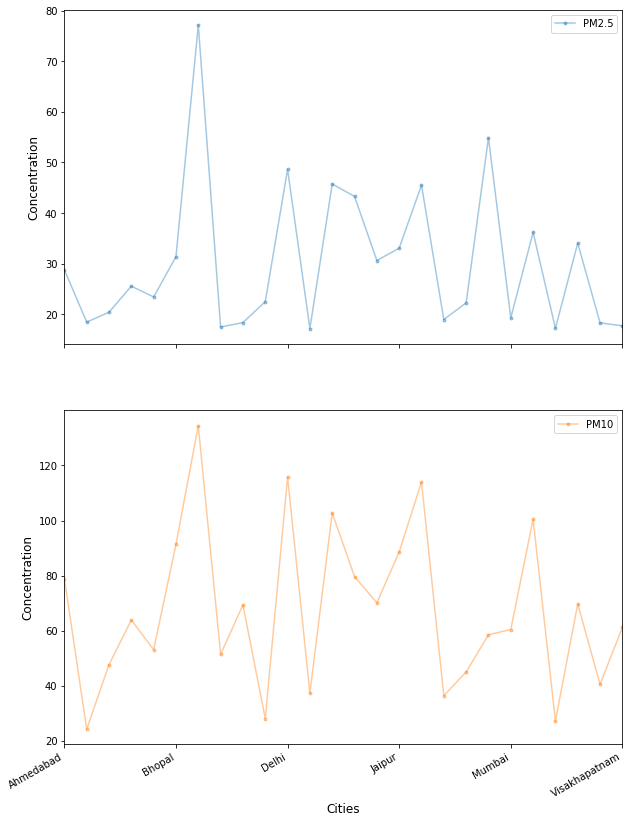

In [60]:
pollutants=['PM2.5','PM10']

axes=df3[pollutants].plot(marker='.',figsize=(10,15),subplots=True,alpha=0.4)
for axes in axes:
    axes.set_xlabel('Cities',fontsize=12)
    axes.set_ylabel('Concentration',fontsize=12)
plt.show()

In [51]:
df3 = postcovid.copy()

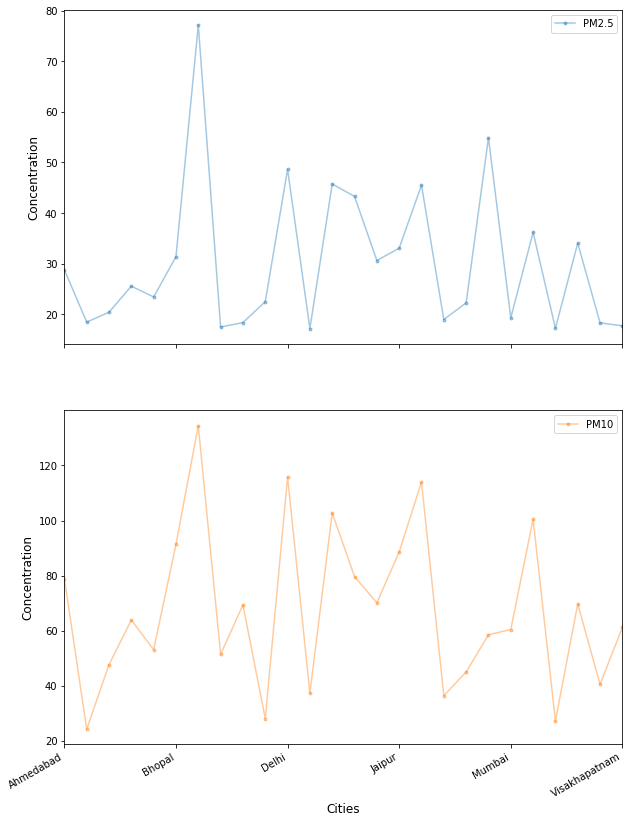

In [61]:
pollutants=['PM2.5','PM10']

axes=df3[pollutants].plot(marker='.',figsize=(10,15),subplots=True,alpha=0.4)
for axes in axes:
    axes.set_xlabel('Cities',fontsize=12)
    axes.set_ylabel('Concentration',fontsize=12)
plt.show()

In [81]:
x=precovid.groupby('City')['SO2'].max().sort_values(ascending=False).reset_index()
x.head(10)

,City,SO2
0,Mumbai,119.962064
1,Ahmedabad,51.544573
2,Jorapokhar,38.892900
3,Talcher,28.973758
4,Patna,21.197412
5,Kochi,18.486935
6,Delhi,15.291896
7,Guwahati,14.454179
8,Amaravati,14.419283
9,Bhopal,13.531693


In [80]:
x=postcovid.groupby('City')['SO2'].max().sort_values(ascending=False).reset_index()
x.head(10)

,City,SO2
0,Talcher,35.283731
1,Jorapokhar,28.276716
2,Ahmedabad,22.691642
3,Kochi,15.696567
4,Guwahati,15.412388
5,Delhi,15.109254
6,Amaravati,14.373582
7,Bhopal,12.698060
8,Mumbai,12.155224
9,Jaipur,11.820746


We can see that populous cities have a visible decrease in the SO2 levels in Mumbai and Ahmedabad but an increase in Talcher as there is a thermal power plant near the city.

In [68]:
x=precovid.groupby('City')['PM2.5'].max().sort_values(ascending=False).reset_index()
x.head()

,City,PM2.5
0,Jorapokhar,150.216380
1,Lucknow,138.020230
2,Patna,121.023641
3,Delhi,120.721996
4,Gurugram,119.797562


In [69]:
x=postcovid.groupby('City')['PM2.5'].max().sort_values(ascending=False).reset_index()
x.head()

,City,PM2.5
0,Brajrajnagar,77.144328
1,Lucknow,54.886418
2,Delhi,48.640299
3,Gurugram,45.747761
4,Jorapokhar,45.522090


In [70]:
z=precovid.groupby('City')['PM10'].max().sort_values(ascending=False).reset_index()
z.head()

,City,PM10
0,Gurugram,297.324953
1,Delhi,234.078057
2,Talcher,178.123685
3,Patna,158.615933
4,Jorapokhar,152.730037


In [71]:
z=postcovid.groupby('City')['PM10'].max().sort_values(ascending=False).reset_index()
z.head()

,City,PM10
0,Brajrajnagar,134.452239
1,Delhi,115.771940
2,Jorapokhar,113.959104
3,Gurugram,102.772239
4,Patna,100.490448


In [76]:
w=precovid.groupby('City')['NO2'].max().sort_values(ascending=False).reset_index()
w.head(6)

,City,NO2
0,Delhi,52.287653
1,Ahmedabad,51.432797
2,Kolkata,43.815882
3,Bhopal,41.614921
4,Patna,37.515358
5,Lucknow,34.202970


In [75]:
w=postcovid.groupby('City')['NO2'].max().sort_values(ascending=False).reset_index()
w.head(6)

,City,NO2
0,Coimbatore,49.618657
1,Brajrajnagar,30.170746
2,Patna,24.929104
3,Visakhapatnam,24.834627
4,Hyderabad,23.583731
5,Delhi,22.445373


In [86]:
DAYS = ['Sun.', 'Mon.', 'Tues.', 'Wed.', 'Thurs.', 'Fri.', 'Sat.']
MONTHS = ['Jan.', 'Feb.', 'Mar.', 'Apr.', 'May', 'June', 'July', 'Aug.', 'Sept.', 'Oct.', 'Nov.', 'Dec.']
colors = ['Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
            'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn']

In [93]:
def covid(city,value):
    df = city_day[city_day['Date'] > '1-1-2020']
    df = df[df['City'] == city]
    fig, ax1 = plt.subplots(figsize= (15,5));
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b'))
    ax1.set_ylabel(value)
    ax1.bar(df['Date'],df[value],color='red');
    df = city_day[city_day['Date'] > '3-24-2020']
    df = df[df['City'] == city]
    ax1.bar(df['Date'],df[value],color='green');
    plt.title('{} {}'.format(value, city))
    

### Pre lockdown is represented by red while post lockdown is represented  by green.

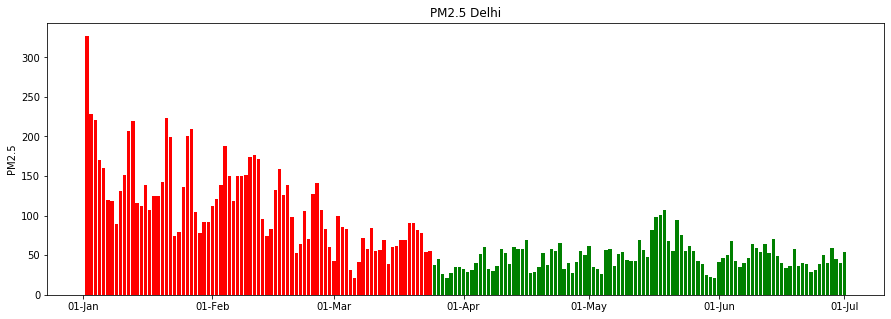

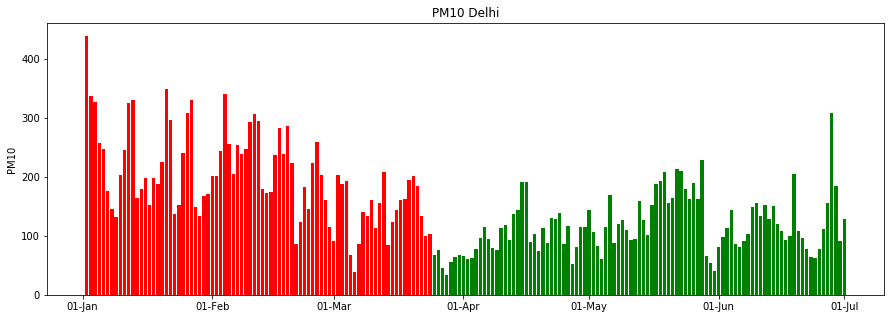

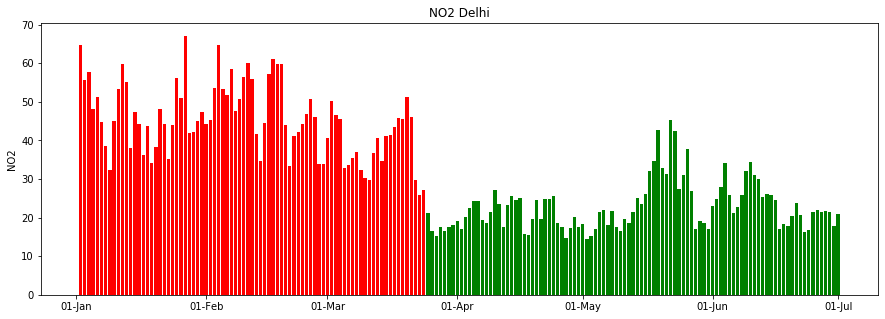

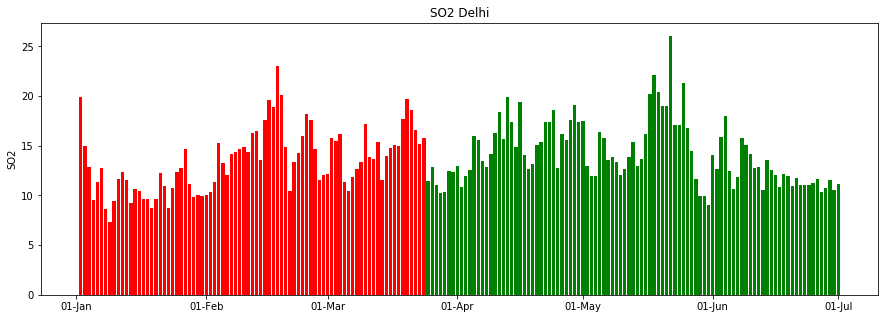

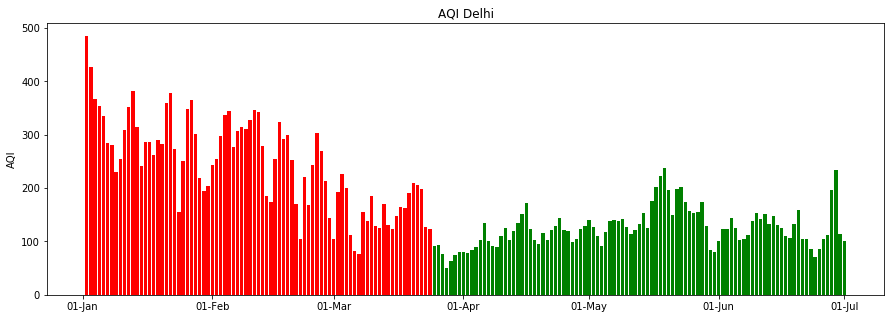

In [94]:
covid('Delhi','PM2.5')
covid('Delhi','PM10')
covid('Delhi','NO2')
covid('Delhi','SO2')
covid('Delhi','AQI')

### We can see clear decreasing trend in the PM2.5 , NO2 and AQI in Delhi

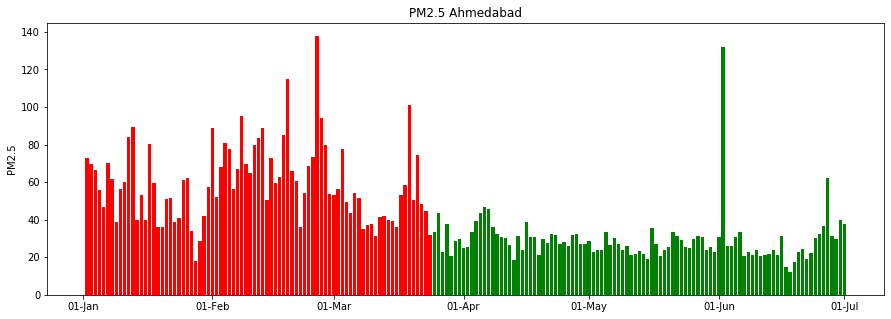

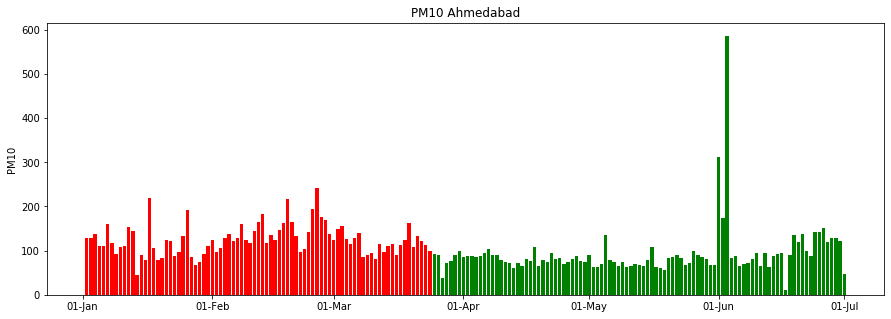

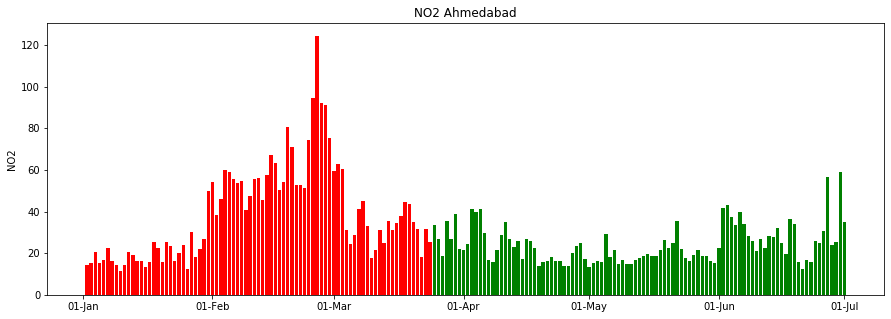

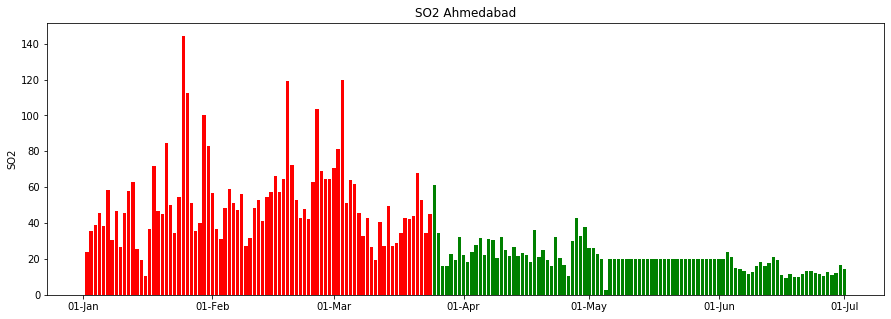

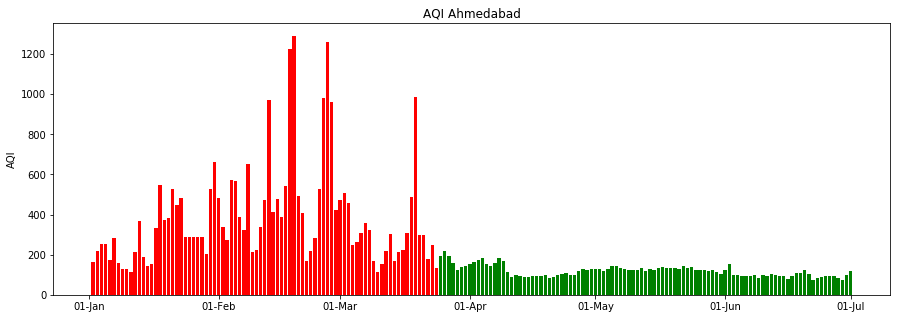

In [95]:
covid('Ahmedabad','PM2.5')
covid('Ahmedabad','PM10')
covid('Ahmedabad','NO2')
covid('Ahmedabad','SO2')
covid('Ahmedabad','AQI')

### We can see clear decreasing trend in the SO2 and AQI levels in Ahmedabad

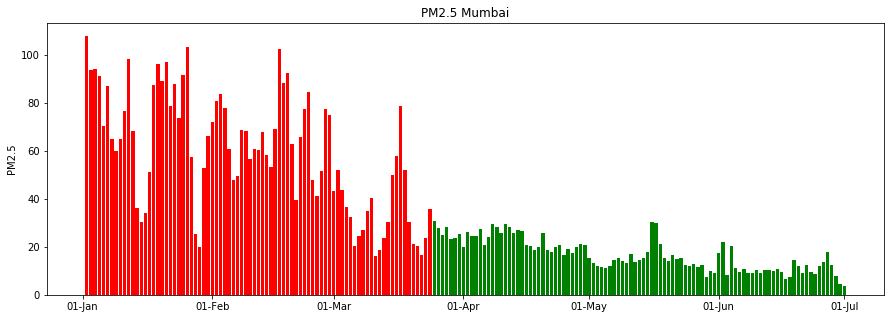

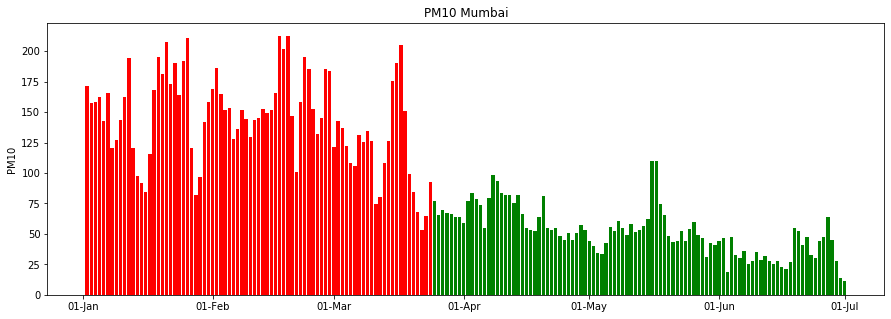

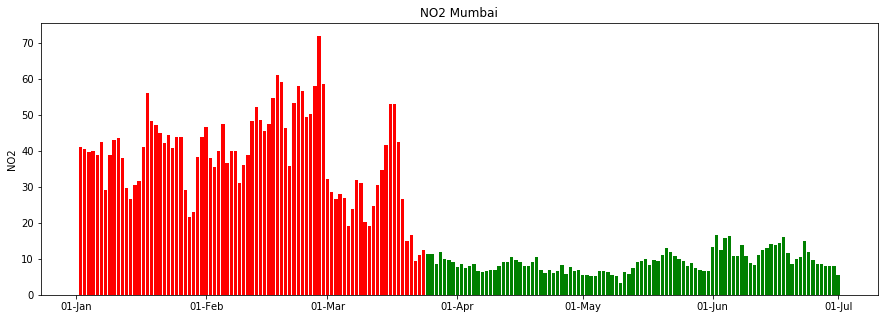

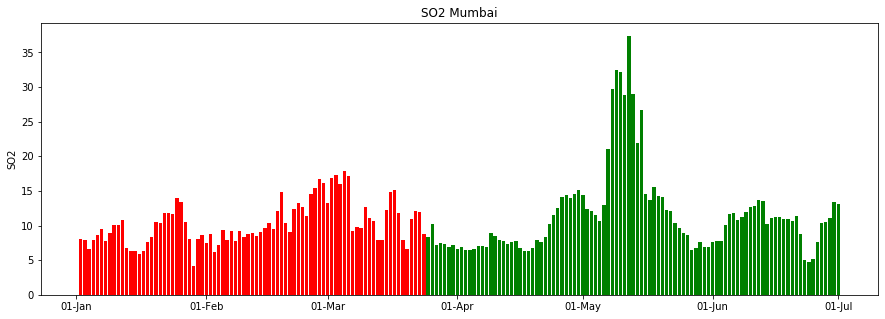

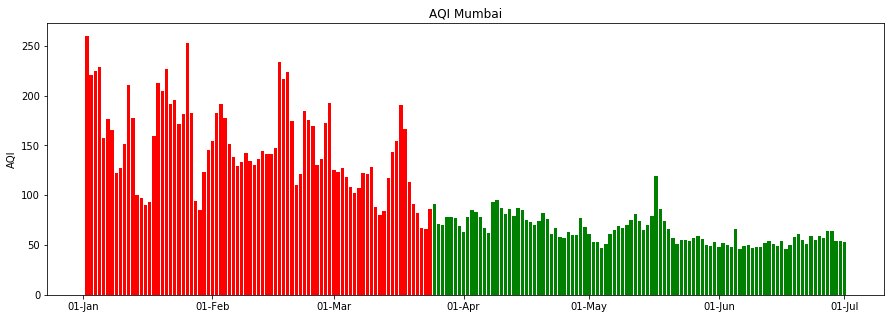

In [96]:
covid('Mumbai','PM2.5')
covid('Mumbai','PM10')
covid('Mumbai','NO2')
covid('Mumbai','SO2')
covid('Mumbai','AQI')

### We can see clear decreasing trend in the PM2.5 ,PM10 ,NO2 and AQI in Mumbai